# Exercicis de Logging i Tractament de Dades

---

## Exercici 1
Explica quines comandes de Linux pots fer servir a l’hora d’analitzar logs escrits a fitxer per a:
- Veure contínuament els logs que es van escrivint a un arxiu.

```bash
tail -f nom_del_fitxer.log
```

- Cercar una paraula concreta dintre d’un arxiu de log.

```bash
grep "paraula_clau" nom_del_fitxer.log
```


---
## Exercici 2
El concepte logging és molt important en la programació, alhora que està estrictament relacionat amb el tema que estem treballant. Un log en el nostre àmbit vindria a ser un fitxer que conté dades relacionades amb els principals esdeveniments i successos que ocorren en un programa o en un sistema operatiu. Així doncs, ja sigui per saber en quin punt hem tingut un error, perquè l'execució del programa no ha anat bé, o quina sèrie de passes ha seguit una persona mentre utilitzava la nostra aplicació i moltes altres utilitats, els Logs són vitals al món del software.

En aquest exercici recuperarem el bucle d’exemple que vam fer servir a les sessions de teoria, i configurarem el log perquè els missatges d’error (i superiors) vagin a un arxiu, i els missatges d’info (i superiors) vagin a un altre arxiu, mentre que tots els missatges es mostren a la vegada per pantalla. A més, afegirem un nou missatge d’info a l’aplicació pel que farem servir un logger especial i diferent del que ja hem fet servir, i que tindrà un manegador amb format CSV.

### Tasques
- Configurar els logs d’info a un fitxer de logs d’info i els logs d’error a un fitxer de logs d’error.
- Afegir, a més del handler de fitxer per a fitxers info, un handler de pantalla amb nivell info.
- Afegir un nou logger amb un nou manegador i un nou formatador a CSV, i afegir una línia al programa que generi aquests logs.
- Pujar al repositori una mostra d’unes 20 línies dels fitxers de logs generats per la vostra aplicació: un d’info, un d’error, i un en format CSV.

In [1]:
import logging
from logging import FileHandler, StreamHandler, Formatter
from time import sleep
import os

# Crear la carpeta per als fitxers de sortida si no existeix
output_dir = 'Exercici_2_Output'
os.makedirs(output_dir, exist_ok=True)

# Configurar logger principal
logger = logging.getLogger('MainLogger')
logger.setLevel(logging.DEBUG)

# Manegador per als errors (i superiors)
error_handler = FileHandler(os.path.join(output_dir, 'errors.log'))
error_handler.setLevel(logging.ERROR)
error_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Manegador per a info (i superiors)
info_handler = FileHandler(os.path.join(output_dir, 'info.log'))
info_handler.setLevel(logging.INFO)
info_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Manegador per mostrar tot per pantalla
console_handler = StreamHandler()
console_handler.setLevel(logging.DEBUG)
console_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Afegir manegadors al logger principal
logger.addHandler(error_handler)
logger.addHandler(info_handler)
logger.addHandler(console_handler)

# Logger amb format CSV
csv_logger = logging.getLogger('CSVLogger')
csv_logger.setLevel(logging.INFO)

# Manegador per al logger CSV
csv_handler = FileHandler(os.path.join(output_dir, 'csv_logs.csv'))
csv_handler.setFormatter(Formatter('%(asctime)s, %(levelname)s, %(message)s'))
csv_logger.addHandler(csv_handler)

# Crear un bucle que generi logs de tipus INFO i ERROR
for i in range(40):
    sleep(1)
    if i % 2 == 0:
        logger.info(f"Aquest és el log d'informació número {i+1}")
    else:
        logger.error(f"Aquest és el log d'error número {i+1}")

# Missatge d'info addicional amb el logger CSV
csv_logger.info('Missatge especial registrat en format CSV.')

2024-11-29 20:18:47,022 - INFO - Aquest és el log d'informació número 1
2024-11-29 20:18:48,023 - ERROR - Aquest és el log d'error número 2
2024-11-29 20:18:49,024 - INFO - Aquest és el log d'informació número 3
2024-11-29 20:18:50,025 - ERROR - Aquest és el log d'error número 4
2024-11-29 20:18:51,027 - INFO - Aquest és el log d'informació número 5
2024-11-29 20:18:52,028 - ERROR - Aquest és el log d'error número 6
2024-11-29 20:18:53,029 - INFO - Aquest és el log d'informació número 7
2024-11-29 20:18:54,030 - ERROR - Aquest és el log d'error número 8
2024-11-29 20:18:55,031 - INFO - Aquest és el log d'informació número 9
2024-11-29 20:18:56,032 - ERROR - Aquest és el log d'error número 10
2024-11-29 20:18:57,034 - INFO - Aquest és el log d'informació número 11
2024-11-29 20:18:58,035 - ERROR - Aquest és el log d'error número 12
2024-11-29 20:18:59,036 - INFO - Aquest és el log d'informació número 13
2024-11-29 20:19:00,037 - ERROR - Aquest és el log d'error número 14
2024-11-29 20:1

### Reflexió
Què creieu que és millor, mostrar els logs a la terminal durant l'execució del programa o bolcar-los en un fitxer de text? Afegiu al `readme.md` del repositori aquesta pregunta amb la seva resposta.

Depèn de l'objectiu i del context d'ús:

 - Mostrar els logs a la terminal és útil durant el desenvolupament o per a una supervisió en temps real, ja que permet detectar ràpidament problemes o comportaments inesperats mentre el programa s'executa.

 - Bolcar els logs en un fitxer de text és més adequat per a aplicacions en producció o per a un anàlisi posterior. Això permet conservar un registre històric dels esdeveniments per depurar errors, auditar el sistema o millorar l'aplicació.



### Taula: Avantatges i desavantatges de maneres de fer logs
| Exemple | Avantatges | Desavantatges |
|---------|------------|---------------|
| Fent servir la configuració per defecte del mòdul logging | Simple d'utilitzar i ràpid d'implementar.	| No permet personalitzar fàcilment el format, nivells o sortida dels logs. |
| Instanciant un objecte logger i parametritzant-lo des del programa | Control total sobre els manegadors, formatadors i nivells de registre. Flexibilitat per ajustar a les necessitats específiques del projecte.	| Pot ser laboriós configurar-ho manualment en aplicacions complexes. |
| Instanciant un objecte logger a partir d’una configuració emmagatzemada a fitxer | Permet una configuració centralitzada i reutilitzable. Fàcil d'actualitzar sense modificar el codi. | Pot requerir més temps inicial per preparar el fitxer de configuració i depurar-lo. |


### Cerca de llibreries de logs
Cerca llibreries de logs en altres llenguatges (almenys 2) i identifica com resolen les següents característiques típiques d’un sistema de logging. Omple la següent taula i inclou-la al `readme.md` del repositori.

| Característica          | Llenguatge 1 (Python)      | Llenguatge 2 (Java)       | Llenguatge 3 (JavaScript)   |
|--------------------------|----------------------------|---------------------------|-----------------------------|
| Nom del llenguatge       | Python                    | Java                      | JavaScript                  |
| Nom de la llibreria      | logging                  | Logback                   | Winston                     |
| És nativa del llenguatge?| Sí                        | No                        | No                          |
| URL per descarregar-se la llibreria | N/A (`logging` ve inclosa) | [https://logback.qos.ch/](https://logback.qos.ch/) | [https://github.com/winstonjs/winston](https://github.com/winstonjs/winston) |
| Inicialització de l’objecte de logger | `logger = logging.getLogger('nom_logger')` | `Logger logger = LoggerFactory.getLogger(Classe.class)` | `const logger = winston.createLogger({...})` |
| Nivells de log disponibles | DEBUG, INFO, WARNING, ERROR, CRITICAL | TRACE, DEBUG, INFO, WARN, ERROR | ERROR, WARN, INFO, HTTP, VERBOSE, DEBUG, SILLY |
| Mètode per fer log       | `logger.info("Missatge")` | `logger.info("Missatge")` | `logger.info("Missatge")`   |
| Tipus de manegadors      | FileHandler, StreamHandler, RotatingFileHandler, etc. | ConsoleAppender, FileAppender, RollingFileAppender, etc. | Console, File, HTTP transports, etc. |
| Opcions de format        | Format per defecte o personalitzat amb `Formatter`. | Configuració amb patrons a `logback.xml`. | Formatters personalitzats amb JSON o text pla. |

---

## Exercici 3
Mitjançant les eines proposades a continuació, voldríem elaborar una petita aplicació que permetés a un treballador de forma senzilla introduir mitjançant un fitxer JSON, TXT, CSV o similar unes dades que escollim i li elaborem una sèrie de gràfiques.

### Eines:
- Pandas: Llibreria de Python per a manipulació i anàlisi de dades. Permet llegir, processar i transformar dades de formats com CSV, JSON, Excel, entre d'altres. És essencial per gestionar i preparar les dades abans de visualitzar-les o generar informes.
- Jupyter Notebook: Entorn interactiu per desenvolupar i executar codi Python. És ideal per analitzar dades, crear prototips i documentar processos amb codi, gràfiques i explicacions en un sol lloc.
- Reportlab: Llibreria per generar documents PDF a partir de codi Python. Ofereix eines per incloure textos, gràfiques i imatges en un format personalitzable, ideal per crear informes finals.

### Tasques:
1. Detallar la funcionalitat de cada una de les eines presentades.
2. Posar captures de les proves que heu fet i argumentar quines eines i llibreries utilitzareu finalment.


In [2]:
# Fem servir la llibreria PANDAS per treballar amb els dataframes amb comoditat.
import pandas as pd

# Llegir fitxer CSV
data = pd.read_csv("Exercici_3_Input/exemple_dades.csv")

# Resum de dades
display(data)

,Nom,Edat,Departament,Salari
0,Anna,25,Vendes,30000
1,Joan,30,IT,45000
2,Maria,22,Màrqueting,32000
3,Pere,35,IT,47000
4,Laura,28,Vendes,31000


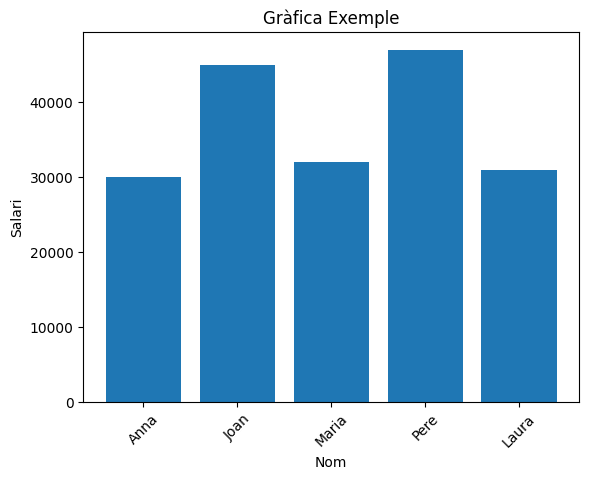

In [3]:
# Fem servir la llibreria PYPLOT per crear gràfiques.
import matplotlib.pyplot as plt

# Gràfica d'exemple
plt.bar(data['Nom'], data['Salari'])  # Dibuixa una gràfica de barres
plt.title('Gràfica Exemple')          # Afegeix un títol
plt.xlabel('Nom')                     # Etiqueta de l'eix X
plt.ylabel('Salari')                  # Etiqueta de l'eix Y
plt.xticks(rotation=45)               # Rota les etiquetes de l'eix X per millorar la visibilitat
plt.show()

In [4]:
pip install reportlab


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Farem servir la llibreria reportlab per crear el informe.
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Crear PDF
c = canvas.Canvas("Exercici_3_Output/informe.pdf", pagesize=letter)
c.drawString(100, 750, "Informe Generat amb ReportLab")
c.save()

---

## Exercici 4
En aquest exercici caldrà generar un CSV amb les dades que treballareu. **Recordeu** que el CSV treballa amb comes. Un cop generat el CSV, caldrà bolcar les dades al Jupyter i comprovar que es mostren correctament.

### Exemple:
| Professor | Alumne  | M01 | M04 | M03 | M05 |
|-----------|---------|-----|-----|-----|-----|
| Emili     | Xavier  | 7   | 9   | 5   | 8   |
| Mario     | Marc    | 10  | 3   | 5   | 8   |
| Steven    | Jaume   | 8   | 5   | 6   | 4   |

### Restriccions:
- El fitxer ha de contenir un mínim de 20 persones.
- Cada registre ha de tenir 5 columnes amb dades.


In [6]:
import csv
import random
import os

# Crear carpeta de sortida
output_dir = 'Exercici_4_Output'
os.makedirs(output_dir, exist_ok=True)

# Ruta del fitxer CSV
csv_file_path = os.path.join(output_dir, 'dades_professors_alumnes.csv')

# Llistes d'exemple
professors = ['Emili', 'Mario', 'Steven', 'Laura', 'Anna', 'Jordi', 'Clara', 'Pere', 'Marta', 'Joan']
alumnes = ['Xavier', 'Marc', 'Jaume', 'Pau', 'Núria', 'Sofia', 'Oriol', 'Eva', 'Toni', 'Laura']

# Generar dades aleatòries
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Escriure capçalera
    writer.writerow(['Professor', 'Alumne', 'M01', 'M04', 'M03', 'M05'])
    
    # Generar 20 registres
    for _ in range(20):
        professor = random.choice(professors)
        alumne = random.choice(alumnes)
        m01 = random.randint(0, 10)
        m04 = random.randint(0, 10)
        m03 = random.randint(0, 10)
        m05 = random.randint(0, 10)
        writer.writerow([professor, alumne, m01, m04, m03, m05])

print(f"Fitxer CSV generat a: {csv_file_path}")


Fitxer CSV generat a: Exercici_4_Output/dades_professors_alumnes.csv


In [7]:
import pandas as pd

# Llegir el fitxer CSV
csv_path = 'Exercici_4_Output/dades_professors_alumnes.csv'
dades = pd.read_csv(csv_path)

# Mostrar les dades
dades.head(4)

,Professor,Alumne,M01,M04,M03,M05
0,Steven,Eva,6,10,6,4
1,Clara,Xavier,1,5,5,5
2,Marta,Marc,4,9,4,7
3,Steven,Sofia,5,2,7,2


---

## Exercici 5
Un cop tractades les dades introduïdes via fitxer, caldrà investigar la llibreria que hagueu triat i elaborar el codi necessari per presentar els resultats amb sentit dins l'àmbit del problema.

### Exemples de càlculs:
- La mitjana de nota final de cada alumne.
- La mitjana de nota final de tots els alumnes conjuntament.
- Percentatges d'aprovats i suspesos.
- Notes més baixes o més altes.
- Altres resultats interessants.

**Restricció**: generar com a mínim 5 resultats coherents amb un procés d’avaluació.

In [8]:
import pandas as pd

# Carregar el fitxer CSV generat a l'Exercici 4
csv_path = 'Exercici_4_Output/dades_professors_alumnes.csv'
dades = pd.read_csv(csv_path)

# Afegir una columna amb la mitjana de les notes per alumne
dades['Mitjana'] = dades[['M01', 'M04', 'M03', 'M05']].mean(axis=1)

# Resultats sol·licitats:
# 1. Mitjana de nota final de cada alumne
mitjanes_alumnes = dades[['Alumne', 'Mitjana']].groupby('Alumne').mean()

# 2. Mitjana de nota final de tots els alumnes conjuntament
mitjana_total = dades['Mitjana'].mean()

# 3. Percentatges d'aprovats i suspesos (considerant aprovats amb nota >= 5)
num_alumnes = len(dades)
aprovats = dades[dades['Mitjana'] >= 5].shape[0]
suspesos = dades[dades['Mitjana'] < 5].shape[0]
percent_aprovats = (aprovats / num_alumnes) * 100
percent_suspesos = (suspesos / num_alumnes) * 100

# 4. Nota més alta i més baixa
nota_mes_alta = dades['Mitjana'].max()
nota_mes_baixa = dades['Mitjana'].min()

# 5. Alumne(s) amb la nota més alta
alumne_nota_mes_alta = dades[dades['Mitjana'] == nota_mes_alta][['Alumne', 'Mitjana']]

# Presentar resultats
print("\n1. Mitjana de nota final de cada alumne:")
display(mitjanes_alumnes)

print("\n2. Mitjana de nota final:")
print(f"{mitjana_total:0.1f}")

print("\n3. Percentatges d'aprovats i suspesos:")
print(f"Aprovats: {percent_aprovats:0.1f} %")
print(f"Suspesos:  {percent_suspesos:0.1f} %")

print("\n4. Nota més alta i més baixa:")
print("Nota més alta: ", nota_mes_alta)
print("Nota més baixa: ", nota_mes_baixa)

print("\nAlumne/s amb la nota més alta:")
print(alumne_nota_mes_alta)


1. Mitjana de nota final de cada alumne:


,Mitjana
Alumne,
Eva,6.166667
Laura,3.666667
Marc,6.375000
Oriol,7.250000
Pau,4.437500
Sofia,3.750000
Toni,5.750000
Xavier,3.625000



2. Mitjana de nota final:
5.0

3. Percentatges d'aprovats i suspesos:
Aprovats: 55.0 %
Suspesos:  45.0 %

4. Nota més alta i més baixa:
Nota més alta:  7.5
Nota més baixa:  1.5

Alumne/s amb la nota més alta:
   Alumne  Mitjana
16   Marc      7.5


---

## Exercici 6
De manera similar a l'Exercici 5, investigueu una llibreria per a la generació de gràfics visuals. Desenvolupeu el codi necessari per generar **4 gràfiques coherents**. Es pot utilitzar la llibreria Python Matplotlib.


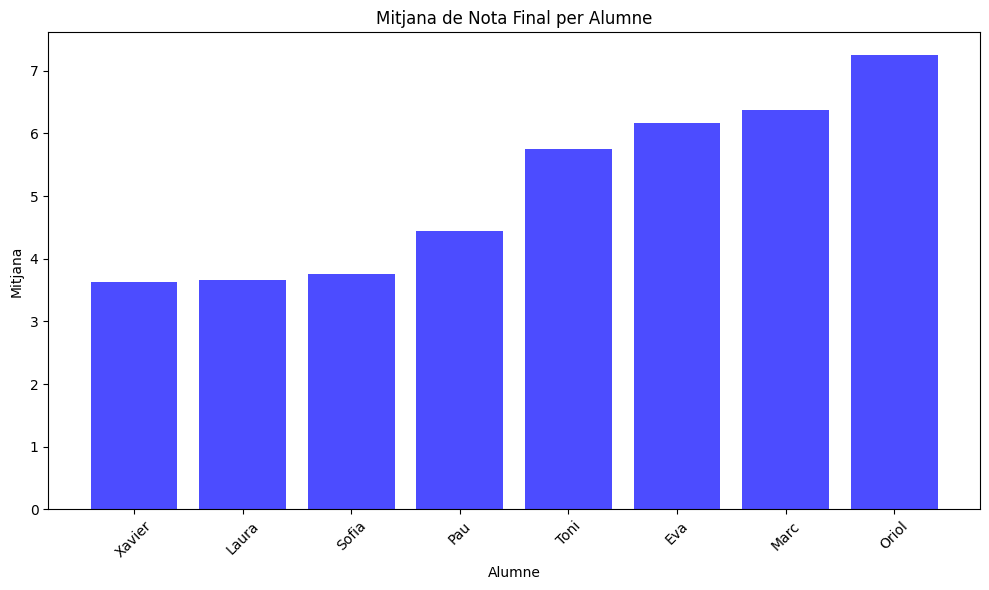

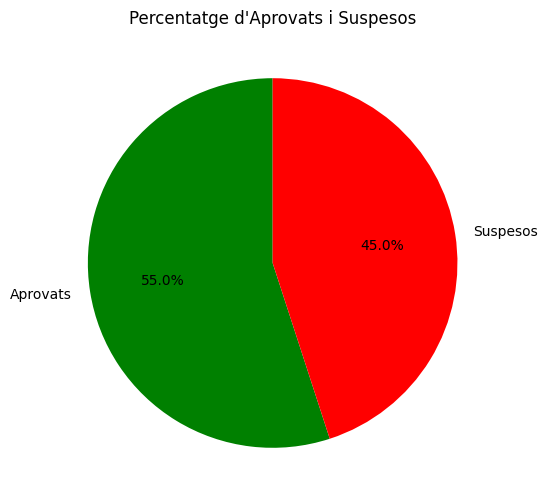

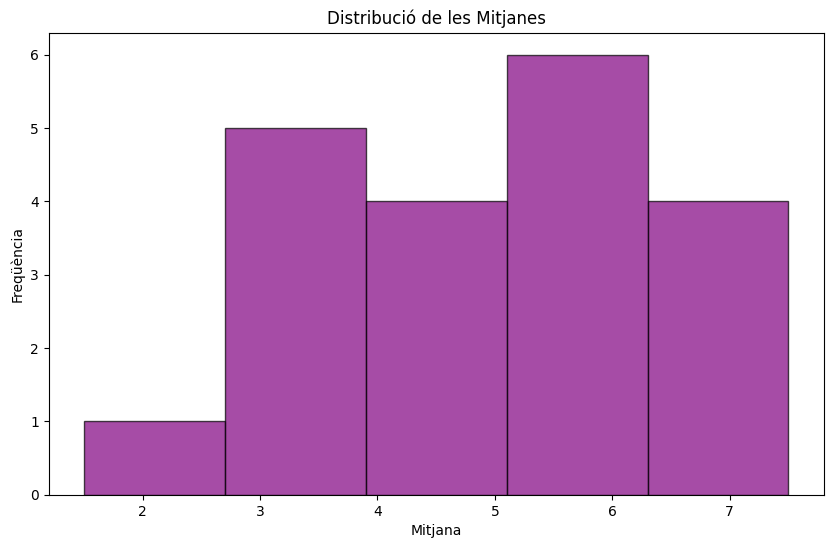

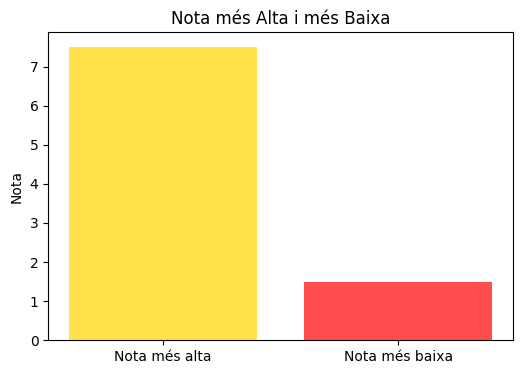

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar el fitxer CSV generat a l'Exercici 4
csv_path = 'Exercici_4_Output/dades_professors_alumnes.csv'
dades = pd.read_csv(csv_path)

# Crear carpeta de sortida
output_dir = 'Exercici_6_Output'
os.makedirs(output_dir, exist_ok=True)

# Rutes de les gràfiques generades a l'exercici 6
grafica1_path = os.path.join(output_dir, "grafica1.png")
grafica2_path = os.path.join(output_dir, "grafica2.png")
grafica3_path = os.path.join(output_dir, "grafica3.png")
grafica4_path = os.path.join(output_dir, "grafica4.png")

# Afegir una columna amb la mitjana de les notes per alumne
dades['Mitjana'] = dades[['M01', 'M04', 'M03', 'M05']].mean(axis=1)

# 1. Gràfica: Mitjana de nota final de cada alumne
mitjanes_alumnes = dades[['Alumne', 'Mitjana']].groupby('Alumne').mean().sort_values(by="Mitjana")
plt.figure(figsize=(10, 6))
plt.bar(mitjanes_alumnes.index, mitjanes_alumnes['Mitjana'], color='blue', alpha=0.7)
plt.title("Mitjana de Nota Final per Alumne")
plt.xlabel("Alumne")
plt.ylabel("Mitjana")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(grafica1_path)
plt.show()
plt.close()

# 2. Gràfica: Percentatge d'aprovats i suspesos
percent_aprovats = (dades[dades['Mitjana'] >= 5].shape[0] / len(dades)) * 100
percent_suspesos = (dades[dades['Mitjana'] < 5].shape[0] / len(dades)) * 100
plt.figure(figsize=(6, 6))
plt.pie([percent_aprovats, percent_suspesos], labels=['Aprovats', 'Suspesos'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title("Percentatge d'Aprovats i Suspesos")
plt.savefig(grafica2_path)
plt.show()
plt.close()

# 3. Gràfica: Distribució de les mitjanes
plt.figure(figsize=(10, 6))
plt.hist(dades['Mitjana'], bins=5, color='purple', alpha=0.7, edgecolor='black')
plt.title("Distribució de les Mitjanes")
plt.xlabel("Mitjana")
plt.ylabel("Freqüència")
plt.savefig(grafica3_path)
plt.show()
plt.close()

# 4. Gràfica: Nota més alta i més baixa
nota_mes_alta = dades['Mitjana'].max()
nota_mes_baixa = dades['Mitjana'].min()
plt.figure(figsize=(6, 4))
plt.bar(['Nota més alta', 'Nota més baixa'], [nota_mes_alta, nota_mes_baixa], color=['gold', 'red'], alpha=0.7)
plt.title("Nota més Alta i més Baixa")
plt.ylabel("Nota")
plt.savefig(grafica4_path)
plt.show()
plt.close()

---

## Exercici 7
Elaborar un informe amb les següents parts:
1. Informe de la part de logging, incloent el codi utilitzat, exemples d’utilització i resultats.
2. Informe del tractament de dades, detallant cada part utilitzada i les gràfiques generades.

In [26]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from PIL import Image
import os

# Crear carpeta de sortida
output_dir = 'Exercici_7_Output'
os.makedirs(output_dir, exist_ok=True)

# Ruta de sortida del PDF
pdf_path = os.path.join(output_dir, "informe.pdf")

# Funció per escalar imatges proporcionalment
def escalar_imatge(image_path, max_width, max_height):
    with Image.open(image_path) as img:
        width, height = img.size
        aspect_ratio = width / height

        if width > max_width:
            width = max_width
            height = width / aspect_ratio

        if height > max_height:
            height = max_height
            width = height * aspect_ratio

        return int(width), int(height)

# Funció per generar el PDF
def generar_informe(pdf_path):
    c = canvas.Canvas(pdf_path, pagesize=letter)
    width, height = letter
    current_y = height - 50  # Coordenada inicial

    # Títol
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, current_y, "Informe de Logging i Tractament de Dades")
    current_y -= 50

    # Secció 1: Logging
    c.setFont("Helvetica-Bold", 14)
    c.drawString(50, current_y, "1. Part de Logging")
    current_y -= 20

    c.setFont("Helvetica", 12)
    c.drawString(50, current_y, "Codi utilitzat:")
    current_y -= 20

    logging_code = '''
            import logging
            from logging import FileHandler, StreamHandler, Formatter
            from time import sleep
            import os
            
            # Crear la carpeta per als fitxers de sortida si no existeix
            output_dir = 'Exercici_2_Output'
            os.makedirs(output_dir, exist_ok=True)
            
            # Configurar logger principal
            logger = logging.getLogger('MainLogger')
            logger.setLevel(logging.DEBUG)
            
            # Manegador per als errors (i superiors)
            error_handler = FileHandler(os.path.join(output_dir, 'errors.log'))
            error_handler.setLevel(logging.ERROR)
            error_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))
            
            # Manegador per a info (i superiors)
            info_handler = FileHandler(os.path.join(output_dir, 'info.log'))
            info_handler.setLevel(logging.INFO)
            info_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))
            
            # Manegador per mostrar tot per pantalla
            console_handler = StreamHandler()
            console_handler.setLevel(logging.DEBUG)
            console_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))
            
            # Afegir manegadors al logger principal
            logger.addHandler(error_handler)
            logger.addHandler(info_handler)
            logger.addHandler(console_handler)
            
            # Logger amb format CSV
            csv_logger = logging.getLogger('CSVLogger')
            csv_logger.setLevel(logging.INFO)
            
            # Manegador per al logger CSV
            csv_handler = FileHandler(os.path.join(output_dir, 'csv_logs.csv'))
            csv_handler.setFormatter(Formatter('%(asctime)s, %(levelname)s, %(message)s'))
            csv_logger.addHandler(csv_handler)
            
            # Crear un bucle que generi logs de tipus INFO i ERROR
            for i in range(40):
                sleep(1)
                if i % 2 == 0:
                    logger.info(f"Aquest és el log d'informació número {i+1}")
                else:
                    logger.error(f"Aquest és el log d'error número {i+1}")
            
            # Missatge d'info addicional amb el logger CSV
            csv_logger.info('Missatge especial registrat en format CSV.')
'''
    c.setFont("Courier", 8)
    textobject = c.beginText(50, current_y)
    for line in logging_code.splitlines():
        if current_y < 100:  # Canviar de pàgina si no hi ha espai
            c.drawText(textobject)
            c.showPage()
            textobject = c.beginText(50, height - 50)
            current_y = height - 50
        textobject.textLine(line)
        current_y -= 10
    c.drawText(textobject)

    # Secció 2: Tractament de Dades
    c.showPage()  # Canviar de pàgina
    current_y = height - 50
    c.setFont("Helvetica-Bold", 14)
    c.drawString(50, current_y, "2. Tractament de Dades i Gràfiques")
    current_y -= 30

    c.setFont("Helvetica", 12)
    c.drawString(50, current_y, "Gràfiques generades:")
    current_y -= 20

    # Inserir gràfiques amb dimensions ajustades
    grafiques = [
        ("Mitjana de Nota Final per Alumne", "Exercici_6_Output/grafica1.png"),
        ("Percentatge d'Aprovats i Suspesos", "Exercici_6_Output/grafica2.png"),
        ("Distribució de les Mitjanes", "Exercici_6_Output/grafica3.png"),
        ("Nota més Alta i més Baixa", "Exercici_6_Output/grafica4.png"),
    ]

    for titol, ruta in grafiques:
        if current_y < 200:  # Canviar de pàgina si no hi ha espai
            c.showPage()
            current_y = height - 50
        c.drawString(50, current_y, f"- {titol}:")
        current_y -= 20

        # Escalar imatge proporcionalment
        img_width, img_height = escalar_imatge(ruta, max_width=400, max_height=200)

        # Inserir imatge
        c.drawImage(ruta, 50, current_y - img_height, width=img_width, height=img_height)
        current_y -= img_height + 30

    # Final del document
    c.save()

# Generar l'informe
generar_informe(pdf_path)
print(f"Informe generat a: {pdf_path}")

Informe generat a: Exercici_7_Output/informe.pdf
